In [1]:
from pysr import PySRRegressor
#import simpy as sp
import os
import yaml
import numpy as np

import json


#PATH = '/home/jpierre/v2/pySr/data/mod1/data.json'
#PATH_CFG = '/master/code/experimental/pysr/cfg_pysr'
PATH = '/home/jpierre/v2/pySr/data/normal/normal_action-None_dropout0_l1-0-lim0.json'

NB_RUN = 500
BINARY_OP = ["+", "*", 'cond']
UNARY_OP = ["inv(x) = 1/x"]
VARIABLES = ['v_x_0', 'v_y_0', 'v_x_1', 'v_y_1', 'v_x_2', 'v_y_2', 'v_x_3', 'v_y_3', 'd', 'delta_x', 'delta_y', 'r_i', 'r_j']
MAX_SIZE = 13
PARSIMONY = 0.0000032



def readJson(filePath:str):
    """
    Function to read json 
    """
    
    with open(filePath, 'r') as f:
        data = json.load(f)
    return data


def writeJson(data, filePath):
    """
    Function to write json 
    """
    with open(filePath, 'w') as f:
        json.dump(data, f, indent=2)


def getData(jsonPath = PATH):
    # for now


    messages = np.array(readJson(jsonPath)['messages'])
    edges = np.array(readJson(jsonPath)['edges'])[:, :3]

    return edges, messages



def getPySrModel(nbRun = NB_RUN, binaryOp = BINARY_OP, unaryOp = UNARY_OP, maxsize = MAX_SIZE):

    model = PySRRegressor(
        niterations=nbRun,
        binary_operators=binaryOp,
        #unary_operators= ["inv(x) = 1/x",],
        #populations=15,
        model_selection = "best",
        maxsize = maxsize,
        #complexity_of_variables = 2,
        #parsimony = PARSIMONY,
        #nested_constraints = {"cond": {"*":0}},
        #adaptive_parsimony_scaling = 1000,
        #ncycles_per_iteration = 1000,
        #turbo = True,
        #extra_sympy_mappings = {"inv": lambda x: 1 / x}
        #elementwise_loss = 'L1DistLoss()',
        weight_optimize = 0.001
    )

    return model


def fittingModel(model, X, y, verbose:bool = False, variables = VARIABLES):

    if verbose:
        print(">>>>> Fitting pySr")


    # Fit model
    model.fit(X, y, 
    variable_names = variables,
    # X_units = [""],
    # y_units = "",
    complexity_of_variables = [1, 3, 3]
    )


    return model

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
X, Y = getData()

In [3]:
print(X.shape)
print(Y.shape)

print(np.min(X[:, 0]))
print(np.max(X[:, 0]))

(7474, 3)
(7474, 2)
1.0214729309082031
1.8998446464538574


In [4]:
print(np.min(Y))
print(np.max(Y))

-0.02926780842244625
0.029359053820371628


In [5]:
#Y = 100 * Y

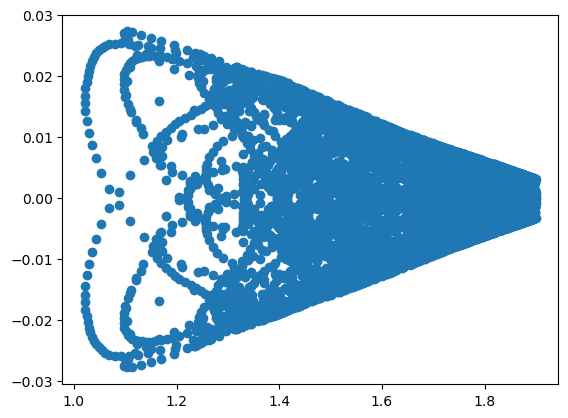

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], Y[:, 0])
plt.show()

In [7]:
pyReg = getPySrModel()

mod = fittingModel(pyReg, X, Y, variables=[' r ', ' cosine ', ' sine '])

/home/jpierre/anaconda3/envs/myenvPy/lib/python3.9/site-packages/pysr/sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/home/jpierre/anaconda3/envs/myenvPy/lib/python3.9/site-packages/pysr/sr.py:1441: UserWarning: Spaces in `variable_names` are not supported. Spaces have been replaced with underscores. 
Please use valid names instead.
  warnings.warn(


Compiling Julia backend...


[ Info: Started!



Expressions evaluated per second: 1.270e+04
Head worker occupation: 15.5%
Progress: 33 / 15000 total iterations (0.220%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
3           8.527e-05  5.314e+00  y₀ = -4.3213e-05 + -4.3213e-05
5           4.075e-05  3.691e-01  y₀ = -0.005259 * _cosine_
11          2.602e-05  7.476e-02  y₀ = cond(0.48735, _cosine_) * (cond(-0.95168, -0.22336) + -0....
                                  0088341)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           4.060e+00  1.594e+01  y₁ = 2.0149
3           8.530e-05  5.382e+00  y₁ = cond(0.6094, -5.8063e-05)
5           2.363e-05  6.418e-0


Expressions evaluated per second: 3.030e+04
Head worker occupation: 14.6%
Progress: 443 / 15000 total iterations (2.953%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.527e-05  1.594e+01  y₀ = -8.7552e-05
5           2.319e-05  3.255e-01  y₀ = _cosine_ * -0.011236
7           2.318e-05  1.650e-04  y₀ = (0.0075454 + _cosine_) * -0.011234
11          2.318e-05  8.941e-08  y₀ = ((1.6802 * (-0.0060238 * 1.1099)) * _cosine_) + -8.7511e-...
                                  05
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.224e+00  1.594e+01  y₁ = 1.1062
3           8.530e-05  4.785e+00  y₁ = co


Expressions evaluated per second: 3.130e+04
Head worker occupation: 15.0%
Progress: 798 / 15000 total iterations (5.320%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.527e-05  1.594e+01  y₀ = -8.7552e-05
5           2.319e-05  3.255e-01  y₀ = _cosine_ * -0.011236
7           2.318e-05  1.652e-04  y₀ = (0.0077983 + _cosine_) * -0.011236
11          1.908e-05  4.859e-02  y₀ = -0.011236 * (_cosine_ + (-0.26268 * _sine_))
13          1.880e-05  7.529e-03  y₀ = ((2.416 * 0.00096799) * (-3.1009 + _r_)) * (2.656 * _cosi...
                                  ne_)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1


Expressions evaluated per second: 3.020e+04
Head worker occupation: 15.0%
Progress: 1227 / 15000 total iterations (8.180%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.527e-05  1.594e+01  y₀ = -8.7552e-05
5           2.319e-05  3.255e-01  y₀ = _cosine_ * -0.011236
7           2.318e-05  1.652e-04  y₀ = (0.0077983 + _cosine_) * -0.011236
9           9.848e-06  4.280e-01  y₀ = (_cosine_ * 0.040953) * (_r_ + -1.8483)
11          5.693e-06  2.740e-01  y₀ = ((0.015089 + 0.015089) * (_r_ + -1.9947)) * _cosine_
13          5.693e-06  2.682e-07  y₀ = (0.010254 * _cosine_) * ((1.334 + 1.6099) * (_r_ + -1.994...
                                  6))
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
--------------------------------------------------------


Expressions evaluated per second: 3.310e+04
Head worker occupation: 15.1%
Progress: 1604 / 15000 total iterations (10.693%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.527e-05  1.594e+01  y₀ = -8.7552e-05
5           2.319e-05  3.255e-01  y₀ = _cosine_ * -0.011236
7           2.318e-05  1.652e-04  y₀ = (0.0077983 + _cosine_) * -0.011236
9           5.693e-06  7.020e-01  y₀ = (-1.9947 + _r_) * (_cosine_ * 0.030182)
13          5.693e-06  7.451e-08  y₀ = (0.010254 * _cosine_) * ((1.334 + 1.6099) * (_r_ + -1.994...
                                  6))
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1    


Expressions evaluated per second: 3.150e+04
Head worker occupation: 15.2%
Progress: 2036 / 15000 total iterations (13.573%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.527e-05  1.594e+01  y₀ = -8.7552e-05
5           2.319e-05  3.255e-01  y₀ = _cosine_ * -0.011236
7           2.318e-05  1.652e-04  y₀ = (0.0077983 + _cosine_) * -0.011236
9           5.693e-06  7.020e-01  y₀ = (-1.9947 + _r_) * (_cosine_ * 0.030182)
11          5.685e-06  6.739e-04  y₀ = ((0.03019 * _cosine_) * (_r_ + -1.9945)) + -8.7529e-05
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.473e-02  1.594e+01  y₁ = -0.12106
3

Head worker occupation: 15.1%
Progress: 2495 / 15000 total iterations (16.633%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.527e-05  1.594e+01  y₀ = -8.7552e-05
5           2.319e-05  3.255e-01  y₀ = _cosine_ * -0.011236
7           2.318e-05  1.652e-04  y₀ = (0.0077983 + _cosine_) * -0.011236
9           5.693e-06  7.020e-01  y₀ = (-1.9947 + _r_) * (_cosine_ * 0.030182)
11          5.685e-06  6.739e-04  y₀ = ((0.03019 * _cosine_) * (_r_ + -1.9945)) + -8.7529e-05
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.473e-02  1.594e+01  y₁ = -0.12106
3           8.530e-05  2.576e+00  y₁ = cond(0.


Expressions evaluated per second: 3.200e+04
Head worker occupation: 15.2%
Progress: 2929 / 15000 total iterations (19.527%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.527e-05  1.594e+01  y₀ = -8.7552e-05
5           2.319e-05  3.255e-01  y₀ = _cosine_ * -0.011236
7           2.318e-05  1.652e-04  y₀ = (0.0077983 + _cosine_) * -0.011236
9           5.693e-06  7.020e-01  y₀ = (-1.9947 + _r_) * (_cosine_ * 0.030182)
11          5.685e-06  6.739e-04  y₀ = ((0.03019 * _cosine_) * (_r_ + -1.9945)) + -8.7529e-05
13          5.685e-06  -0.000e+00  y₀ = cond(1.1568, -8.75e-05) + ((0.03019 * _cosine_) * (-1.994...
                                  5 + _r_))
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
----------------------------------------------


Expressions evaluated per second: 3.200e+04
Head worker occupation: 16.3%
Progress: 3341 / 15000 total iterations (22.273%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.527e-05  1.594e+01  y₀ = -8.7552e-05
5           2.319e-05  3.255e-01  y₀ = _cosine_ * -0.011236
7           2.318e-05  1.652e-04  y₀ = (0.0077983 + _cosine_) * -0.011236
9           5.693e-06  7.020e-01  y₀ = (-1.9947 + _r_) * (_cosine_ * 0.030182)
11          5.685e-06  6.740e-04  y₀ = -8.75e-05 + ((-1.9945 + _r_) * (0.03019 * _cosine_))
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.473e-02  1.594e+01  y₁ = -0.12106
3  


Expressions evaluated per second: 4.010e+04
Head worker occupation: 15.9%
Progress: 3813 / 15000 total iterations (25.420%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.527e-05  1.594e+01  y₀ = -8.7552e-05
5           2.319e-05  3.255e-01  y₀ = _cosine_ * -0.011236
7           2.318e-05  1.652e-04  y₀ = (0.0077983 + _cosine_) * -0.011236
9           5.693e-06  7.020e-01  y₀ = (-1.9947 + _r_) * (_cosine_ * 0.030182)
11          5.685e-06  6.740e-04  y₀ = -8.75e-05 + ((-1.9945 + _r_) * (0.03019 * _cosine_))
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.473e-02  1.594e+01  y₁ = -0.12106
3  


Expressions evaluated per second: 4.460e+04
Head worker occupation: 15.5%
Progress: 4408 / 15000 total iterations (29.387%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.527e-05  1.594e+01  y₀ = -8.7552e-05
5           2.319e-05  3.255e-01  y₀ = _cosine_ * -0.011236
7           2.318e-05  1.652e-04  y₀ = (0.0077983 + _cosine_) * -0.011236
9           5.693e-06  7.020e-01  y₀ = (-1.9947 + _r_) * (_cosine_ * 0.030182)
11          5.685e-06  6.740e-04  y₀ = -8.75e-05 + ((-1.9945 + _r_) * (0.03019 * _cosine_))
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.473e-02  1.594e+01  y₁ = -0.12106
3  


Expressions evaluated per second: 4.400e+04
Head worker occupation: 15.0%
Progress: 4989 / 15000 total iterations (33.260%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.527e-05  1.594e+01  y₀ = -8.7552e-05
5           2.319e-05  3.255e-01  y₀ = _cosine_ * -0.011236
7           2.318e-05  1.652e-04  y₀ = (0.0077983 + _cosine_) * -0.011236
9           5.693e-06  7.020e-01  y₀ = (-1.9947 + _r_) * (_cosine_ * 0.030182)
11          5.685e-06  6.740e-04  y₀ = -8.75e-05 + ((-1.9945 + _r_) * (0.03019 * _cosine_))
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.530e-05  1.594e+01  y₁ = -5.8063e-05



Expressions evaluated per second: 4.870e+04
Head worker occupation: 14.9%
Progress: 5529 / 15000 total iterations (36.860%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.527e-05  1.594e+01  y₀ = -8.7552e-05
5           2.319e-05  3.255e-01  y₀ = _cosine_ * -0.011236
7           2.318e-05  1.652e-04  y₀ = (0.0077983 + _cosine_) * -0.011236
9           5.693e-06  7.020e-01  y₀ = (-1.9947 + _r_) * (_cosine_ * 0.030182)
11          5.685e-06  6.740e-04  y₀ = -8.75e-05 + ((-1.9945 + _r_) * (0.03019 * _cosine_))
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.530e-05  1.594e+01  y₁ = -5.8063e-05



Expressions evaluated per second: 4.060e+04
Head worker occupation: 12.8%
Progress: 6172 / 15000 total iterations (41.147%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.527e-05  1.594e+01  y₀ = -8.7552e-05
5           2.319e-05  3.255e-01  y₀ = _cosine_ * -0.011236
7           2.318e-05  1.652e-04  y₀ = (0.0077983 + _cosine_) * -0.011236
9           5.693e-06  7.020e-01  y₀ = (-1.9947 + _r_) * (_cosine_ * 0.030182)
11          5.685e-06  6.740e-04  y₀ = -8.75e-05 + ((-1.9945 + _r_) * (0.03019 * _cosine_))
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.530e-05  1.594e+01  y₁ = -5.8063e-05



Expressions evaluated per second: 5.020e+04
Head worker occupation: 12.8%
Progress: 6726 / 15000 total iterations (44.840%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.527e-05  1.594e+01  y₀ = -8.7552e-05
5           2.319e-05  3.255e-01  y₀ = _cosine_ * -0.011236
7           2.318e-05  1.652e-04  y₀ = (0.0077983 + _cosine_) * -0.011236
9           5.693e-06  7.020e-01  y₀ = (-1.9947 + _r_) * (_cosine_ * 0.030182)
11          5.685e-06  6.740e-04  y₀ = -8.75e-05 + ((-1.9945 + _r_) * (0.03019 * _cosine_))
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.530e-05  1.594e+01  y₁ = -5.8063e-05



Expressions evaluated per second: 4.730e+04
Head worker occupation: 12.7%
Progress: 7263 / 15000 total iterations (48.420%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.527e-05  1.594e+01  y₀ = -8.7552e-05
5           2.319e-05  3.255e-01  y₀ = _cosine_ * -0.011236
7           2.318e-05  1.652e-04  y₀ = (0.0077983 + _cosine_) * -0.011236
9           5.693e-06  7.020e-01  y₀ = (-1.9947 + _r_) * (_cosine_ * 0.030182)
11          5.685e-06  6.740e-04  y₀ = -8.75e-05 + ((-1.9945 + _r_) * (0.03019 * _cosine_))
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.530e-05  1.594e+01  y₁ = -5.8063e-05



Expressions evaluated per second: 4.440e+04
Head worker occupation: 12.7%
Progress: 7783 / 15000 total iterations (51.887%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.527e-05  1.594e+01  y₀ = -8.7552e-05
5           2.319e-05  3.255e-01  y₀ = _cosine_ * -0.011236
7           2.318e-05  1.652e-04  y₀ = (0.0077983 + _cosine_) * -0.011236
9           5.693e-06  7.020e-01  y₀ = (-1.9947 + _r_) * (_cosine_ * 0.030182)
11          5.685e-06  6.740e-04  y₀ = -8.75e-05 + ((-1.9945 + _r_) * (0.03019 * _cosine_))
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.530e-05  1.594e+01  y₁ = -5.8063e-05



Expressions evaluated per second: 3.740e+04
Head worker occupation: 12.7%
Progress: 8213 / 15000 total iterations (54.753%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.527e-05  1.594e+01  y₀ = -8.7552e-05
5           2.319e-05  3.255e-01  y₀ = _cosine_ * -0.011236
7           2.318e-05  1.652e-04  y₀ = (0.0077983 + _cosine_) * -0.011236
9           5.693e-06  7.020e-01  y₀ = (-1.9947 + _r_) * (_cosine_ * 0.030182)
11          5.685e-06  6.740e-04  y₀ = -8.75e-05 + ((-1.9945 + _r_) * (0.03019 * _cosine_))
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.530e-05  1.594e+01  y₁ = -5.8063e-05



Expressions evaluated per second: 4.250e+04
Head worker occupation: 12.7%
Progress: 8749 / 15000 total iterations (58.327%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.527e-05  1.594e+01  y₀ = -8.7552e-05
5           2.319e-05  3.255e-01  y₀ = _cosine_ * -0.011236
7           2.318e-05  1.652e-04  y₀ = (0.0077983 + _cosine_) * -0.011236
9           5.693e-06  7.020e-01  y₀ = (-1.9947 + _r_) * (_cosine_ * 0.030182)
11          5.685e-06  6.740e-04  y₀ = -8.75e-05 + ((-1.9945 + _r_) * (0.03019 * _cosine_))
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.530e-05  1.594e+01  y₁ = -5.8063e-05



Expressions evaluated per second: 4.240e+04
Head worker occupation: 12.9%
Progress: 9221 / 15000 total iterations (61.473%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.527e-05  1.594e+01  y₀ = -8.7552e-05
5           2.319e-05  3.255e-01  y₀ = _cosine_ * -0.011236
7           2.318e-05  1.652e-04  y₀ = (0.0077983 + _cosine_) * -0.011236
9           5.693e-06  7.020e-01  y₀ = (-1.9947 + _r_) * (_cosine_ * 0.030182)
11          5.685e-06  6.740e-04  y₀ = -8.75e-05 + ((-1.9945 + _r_) * (0.03019 * _cosine_))
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.530e-05  1.594e+01  y₁ = -5.8063e-05



Expressions evaluated per second: 4.350e+04
Head worker occupation: 13.5%
Progress: 9717 / 15000 total iterations (64.780%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.527e-05  1.594e+01  y₀ = -8.7552e-05
5           2.319e-05  3.255e-01  y₀ = _cosine_ * -0.011236
7           2.318e-05  1.652e-04  y₀ = (0.0077983 + _cosine_) * -0.011236
9           5.693e-06  7.020e-01  y₀ = (-1.9947 + _r_) * (_cosine_ * 0.030182)
11          5.685e-06  6.740e-04  y₀ = -8.75e-05 + ((-1.9945 + _r_) * (0.03019 * _cosine_))
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.530e-05  1.594e+01  y₁ = -5.8063e-05



Expressions evaluated per second: 3.950e+04
Head worker occupation: 13.6%
Progress: 10258 / 15000 total iterations (68.387%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.527e-05  1.594e+01  y₀ = -8.7552e-05
5           2.319e-05  3.255e-01  y₀ = _cosine_ * -0.011236
7           2.318e-05  1.652e-04  y₀ = (0.0077983 + _cosine_) * -0.011236
9           5.693e-06  7.020e-01  y₀ = (-1.9947 + _r_) * (_cosine_ * 0.030182)
11          5.685e-06  6.740e-04  y₀ = -8.75e-05 + ((-1.9945 + _r_) * (0.03019 * _cosine_))
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.530e-05  1.594e+01  y₁ = -5.8063e-05


Expressions evaluated per second: 4.300e+04
Head worker occupation: 13.9%
Progress: 10920 / 15000 total iterations (72.800%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.527e-05  1.594e+01  y₀ = -8.7552e-05
5           2.319e-05  3.255e-01  y₀ = _cosine_ * -0.011236
7           2.318e-05  1.652e-04  y₀ = (0.0077983 + _cosine_) * -0.011236
9           5.693e-06  7.020e-01  y₀ = (-1.9947 + _r_) * (_cosine_ * 0.030182)
11          5.685e-06  6.740e-04  y₀ = -8.75e-05 + ((-1.9945 + _r_) * (0.03019 * _cosine_))
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.530e-05  1.594e+01  y₁ = -5.8063e-05


Expressions evaluated per second: 4.470e+04
Head worker occupation: 14.4%
Progress: 11423 / 15000 total iterations (76.153%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.527e-05  1.594e+01  y₀ = -8.7552e-05
5           2.319e-05  3.255e-01  y₀ = _cosine_ * -0.011236
7           2.318e-05  1.652e-04  y₀ = (0.0077983 + _cosine_) * -0.011236
9           5.693e-06  7.020e-01  y₀ = (-1.9947 + _r_) * (_cosine_ * 0.030182)
11          5.685e-06  6.740e-04  y₀ = -8.75e-05 + ((-1.9945 + _r_) * (0.03019 * _cosine_))
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.530e-05  1.594e+01  y₁ = -5.8063e-05


Expressions evaluated per second: 3.870e+04
Head worker occupation: 14.9%
Progress: 11949 / 15000 total iterations (79.660%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.527e-05  1.594e+01  y₀ = -8.7552e-05
5           2.319e-05  3.255e-01  y₀ = _cosine_ * -0.011236
7           2.318e-05  1.652e-04  y₀ = (0.0077983 + _cosine_) * -0.011236
9           5.693e-06  7.020e-01  y₀ = (-1.9947 + _r_) * (_cosine_ * 0.030182)
11          5.685e-06  6.740e-04  y₀ = -8.75e-05 + ((-1.9945 + _r_) * (0.03019 * _cosine_))
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.530e-05  1.594e+01  y₁ = -5.8063e-05


Expressions evaluated per second: 4.170e+04
Head worker occupation: 14.6%
Progress: 12614 / 15000 total iterations (84.093%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.527e-05  1.594e+01  y₀ = -8.7552e-05
5           2.319e-05  3.255e-01  y₀ = _cosine_ * -0.011236
7           2.318e-05  1.652e-04  y₀ = (0.0077983 + _cosine_) * -0.011236
9           5.693e-06  7.020e-01  y₀ = (-1.9947 + _r_) * (_cosine_ * 0.030182)
11          5.685e-06  6.740e-04  y₀ = -8.75e-05 + ((-1.9945 + _r_) * (0.03019 * _cosine_))
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.530e-05  1.594e+01  y₁ = -5.8063e-05


Expressions evaluated per second: 4.190e+04
Head worker occupation: 14.8%
Progress: 13155 / 15000 total iterations (87.700%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.527e-05  1.594e+01  y₀ = -8.7552e-05
5           2.319e-05  3.255e-01  y₀ = _cosine_ * -0.011236
7           2.318e-05  1.652e-04  y₀ = (0.0077983 + _cosine_) * -0.011236
9           5.693e-06  7.020e-01  y₀ = (-1.9947 + _r_) * (_cosine_ * 0.030182)
11          5.685e-06  6.740e-04  y₀ = -8.75e-05 + ((-1.9945 + _r_) * (0.03019 * _cosine_))
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.530e-05  1.594e+01  y₁ = -5.8063e-05


Expressions evaluated per second: 4.380e+04
Head worker occupation: 15.1%
Progress: 13953 / 15000 total iterations (93.020%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.527e-05  1.594e+01  y₀ = -8.7552e-05
5           2.319e-05  3.255e-01  y₀ = _cosine_ * -0.011236
7           2.318e-05  1.652e-04  y₀ = (0.0077983 + _cosine_) * -0.011236
9           5.693e-06  7.020e-01  y₀ = (-1.9947 + _r_) * (_cosine_ * 0.030182)
11          5.685e-06  6.740e-04  y₀ = -8.75e-05 + ((-1.9945 + _r_) * (0.03019 * _cosine_))
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.530e-05  1.594e+01  y₁ = -5.8063e-05


Expressions evaluated per second: 4.060e+04
Head worker occupation: 15.0%
Progress: 14412 / 15000 total iterations (96.080%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.527e-05  1.594e+01  y₀ = -8.7552e-05
5           2.319e-05  3.255e-01  y₀ = _cosine_ * -0.011236
7           2.318e-05  1.652e-04  y₀ = (0.0077983 + _cosine_) * -0.011236
9           5.693e-06  7.020e-01  y₀ = (-1.9947 + _r_) * (_cosine_ * 0.030182)
11          5.685e-06  6.740e-04  y₀ = -8.75e-05 + ((-1.9945 + _r_) * (0.03019 * _cosine_))
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.530e-05  1.594e+01  y₁ = -5.8063e-05

In [8]:
print(mod.latex_table(indices=None, precision=3, columns=['equation', 'complexity', 'loss', 'score']))

\usepackage{breqn}
\usepackage{booktabs}

...

\begin{table}[h]
\begin{center}
\begin{tabular}{@{}cccc@{}}
\toprule
Equation & Complexity & Loss & Score \\
\midrule
$y_{0} = -8.75 \cdot 10^{-5}$ & $1$ & $8.53 \cdot 10^{-5}$ & $0.0$ \\
$y_{0} = _cosine_{} \left(-0.0112\right)$ & $5$ & $2.32 \cdot 10^{-5}$ & $0.326$ \\
\begin{minipage}{0.8\linewidth} \vspace{-1em} \begin{dmath*} y_{0} = \left(_cosine_{} + 0.00780\right) \left(-0.0112\right) \end{dmath*} \end{minipage} & $7$ & $2.32 \cdot 10^{-5}$ & $0.000165$ \\
$y_{0} = \left(_r_{} - 1.99\right) _cosine_{} 0.0302$ & $9$ & $5.69 \cdot 10^{-6}$ & $0.702$ \\
\begin{minipage}{0.8\linewidth} \vspace{-1em} \begin{dmath*} y_{0} = \left(_r_{} - 1.99\right) 0.0302 _cosine_{} - 8.75 \cdot 10^{-5} \end{dmath*} \end{minipage} & $11$ & $5.69 \cdot 10^{-6}$ & $0.000674$ \\
\bottomrule
\end{tabular}
\end{center}
\end{table}

\begin{table}[h]
\begin{center}
\begin{tabular}{@{}cccc@{}}
\toprule
Equation & Complexity & Loss & Score \\
\midrule
$y_{1} = -

In [9]:
print(mod.sympy())

[(_r_ - 1.9946729)*_cosine_*0.030181507, _sine_*(_r_*0.030785086 - 0.06139419)]


In [10]:
print(X.shape)

(7474, 3)
